# CSE4062 Data Science - Delivery #2

## Göksel Tokur - 150116049

## Arda Bayram-150116029

## Gülnihal Erdem - 150319554

## İrem Seçmen - 170219006

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
# Read Data
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', header=None, encoding='latin')
df.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

# Data reduction
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

In [3]:
labels_dict = {0:'Negative', 2:'Neutral', 4:'Positive'}

def convert_labels(label):
    return labels_dict[label]

df.label = df.label.apply(lambda x: convert_labels(x))
df

,label,tweet
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


Text(0.5, 1.0, 'Data Distribution')

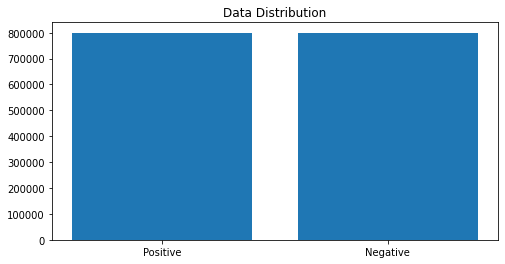

In [4]:
instances = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(instances.index, instances.values)
plt.title("Data Distribution")

## Preprocess

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

punctuations_and_dummies = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"



'''
def preprocess(df, will_be_stemmed=False):
    for index, row in df.iterrows():
        tweet = row.tweet
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        df.tweet = " ".join(tokens)


preprocess(df.tweet)
'''


def preprocess(tweet, will_be_stemmed=False):
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        return " ".join(tokens)
    
df.tweet = df.tweet.apply(lambda tw: preprocess(tw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Remove 0 length tweets
df = df[df.iloc[:,1].astype(str).str.len()!=0]

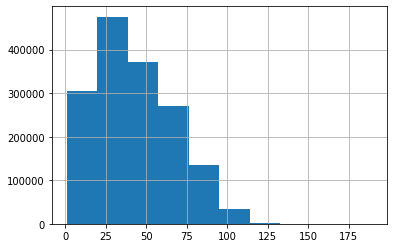

count    1.592328e+06
mean     4.279740e+01
std      2.415896e+01
min      1.000000e+00
25%      2.300000e+01
50%      3.900000e+01
75%      6.000000e+01
max      1.890000e+02
dtype: float64

In [7]:
tweets_len = [len(x) for x in df['tweet']]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

### Number of Letters

In [8]:
all_str = ""
for i in df.tweet:
    all_str += i

In [9]:
from collections import Counter

letter_list = list(all_str)
my_counter = Counter(letter_list)

letter_df = pd.DataFrame.from_dict(my_counter, orient='index').reset_index()
letter_df = letter_df.rename(columns={'index':'letter', 0:'frequency'})
letter_df = letter_df.loc[letter_df['letter'].isin(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])]
letter_df['all_tweets_relative_freq']=letter_df['frequency']/letter_df['frequency'].sum()
letter_df = letter_df.sort_values('letter')

english = pd.read_csv('../data/letter_frequency_en_US.csv')
english['expected_relative_frequency'] = english['count']/english['count'].sum()
english = english.drop(['count'], axis=1)

letter_df = pd.merge(letter_df, english, on='letter')
letter_df['expected'] = np.round(letter_df['expected_relative_frequency']*letter_df['frequency'].sum(),0)
letter_df = letter_df.reset_index().drop(['index'], axis=1)
letter_df

,letter,frequency,all_tweets_relative_freq,expected_relative_frequency,expected
0,a,4547601,0.078816,0.081238,4687379.0
1,b,975326,0.016904,0.014893,859300.0
2,c,1705409,0.029557,0.027114,1564464.0
3,d,2289515,0.039680,0.043192,2492128.0
4,e,6471295,0.112156,0.120195,6935169.0
5,f,878849,0.015232,0.023039,1329304.0
6,g,2231747,0.038679,0.020257,1168838.0
7,h,2234047,0.038719,0.059215,3416628.0
8,i,3779579,0.065505,0.073054,4215160.0
9,j,143817,0.002493,0.001031,59502.0


<AxesSubplot:ylabel='letter'>

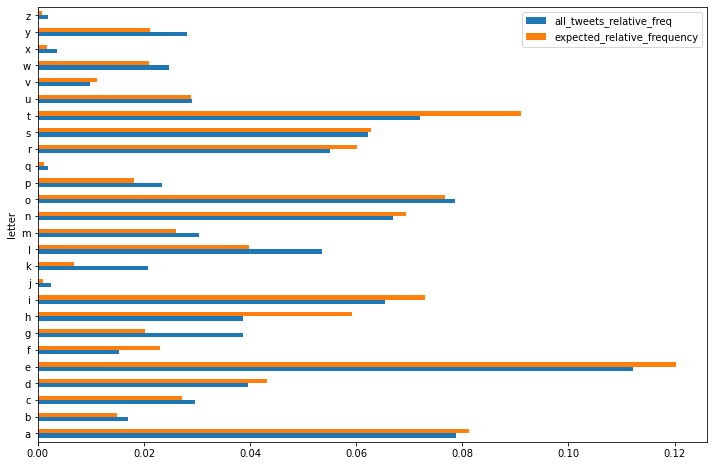

In [10]:
letter_df.plot(x="letter", y=["all_tweets_relative_freq", "expected_relative_frequency"], kind="barh", figsize=(12,8))

#### Compare the Observed Frequencies with the Expected Frequencies in English 

In [11]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(letter_df[['frequency', 'expected']])
p

0.0

We get that the p-value (p) is 0 which implies that the letter frequency does not follow the same distribution with what we see in English tests, although the Pearson correlation is too high (~96.7%).

In [12]:
letter_df[['frequency', 'expected']].corr()

,frequency,expected
frequency,1.000000,0.967421
expected,0.967421,1.000000


In [13]:
df1 = df.copy()

df1['number_of_characters'] = [len(tw) for tw in df1.tweet]
df1

,label,tweet,number_of_characters
0,Negative,awww bummer shoulda got david carr third day,44
1,Negative,upset update facebook texting might cry result...,69
2,Negative,dived many times ball managed save 50 rest go ...,52
3,Negative,whole body feels itchy like fire,32
4,Negative,behaving mad see,16
...,...,...,...
1599995,Positive,woke school best feeling ever,29
1599996,Positive,thewdb com cool hear old walt interviews,40
1599997,Positive,ready mojo makeover ask details,31
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,52


In [14]:
df1.number_of_characters.max()

189

In [15]:
df1.number_of_characters.min()

1

In [16]:
df1.number_of_characters.mean()

42.7974010379771

In [17]:
df1.number_of_characters.std()

24.158961650697616

## Number of Words

In [18]:
df1['number_of_words'] = [len(tw.split()) for tw in df1.tweet]
df1

,label,tweet,number_of_characters,number_of_words
0,Negative,awww bummer shoulda got david carr third day,44,8
1,Negative,upset update facebook texting might cry result...,69,11
2,Negative,dived many times ball managed save 50 rest go ...,52,10
3,Negative,whole body feels itchy like fire,32,6
4,Negative,behaving mad see,16,3
...,...,...,...,...
1599995,Positive,woke school best feeling ever,29,5
1599996,Positive,thewdb com cool hear old walt interviews,40,7
1599997,Positive,ready mojo makeover ask details,31,5
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,52,9


In [19]:
df1.number_of_words.max()

50

In [20]:
df1.number_of_words.min()

1

In [21]:
df1.number_of_words.mean()

7.244474128445898

In [22]:
df1.number_of_words.std()

4.030421805719796

### Positives + Negatives

<BarContainer object of 20 artists>

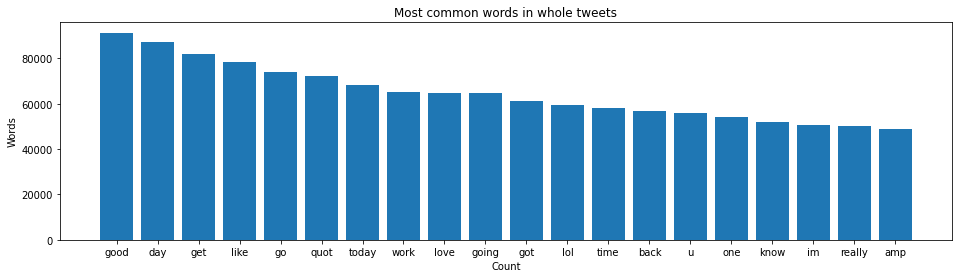

In [23]:
import collections
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

all_tweets = ' '.join(df['tweet'].str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in whole tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

### Positives

<BarContainer object of 20 artists>

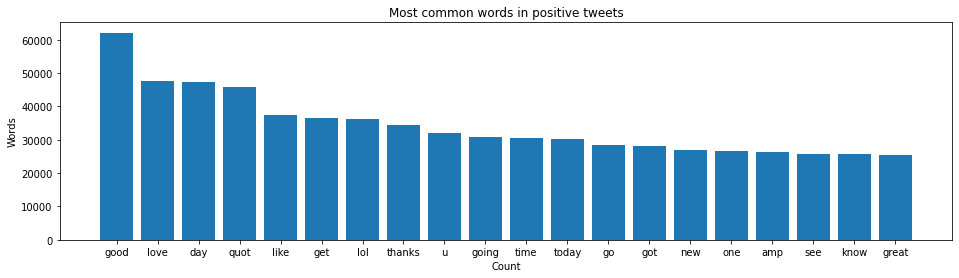

In [24]:
all_tweets = ' '.join(df[df.label == 'Positive'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in positive tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

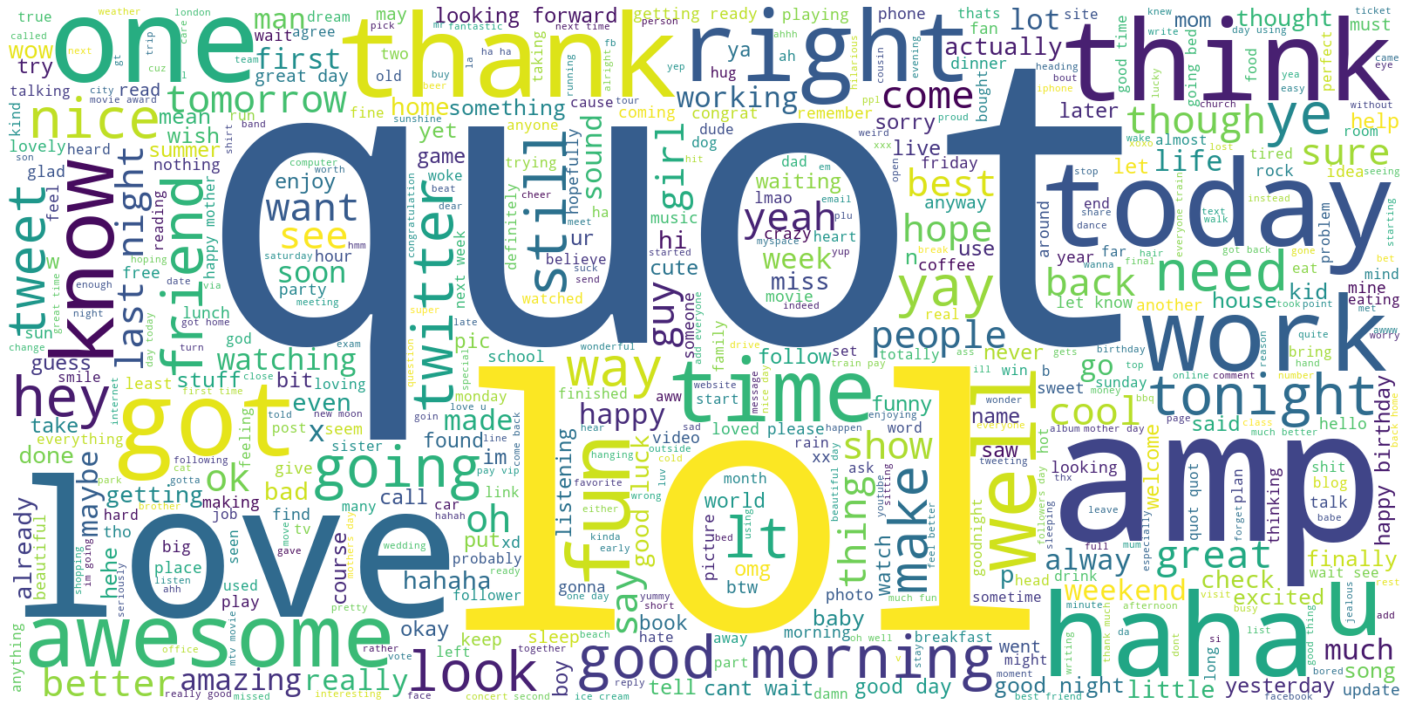

In [25]:
plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Positive'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

### Negatives

<BarContainer object of 20 artists>

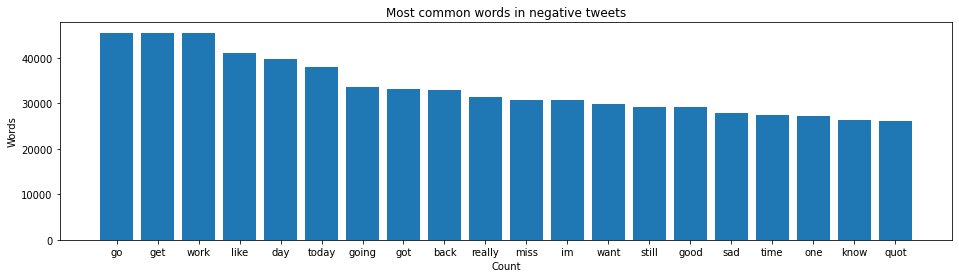

In [26]:
all_tweets = ' '.join(df[df.label == 'Negative'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    
plt.figure(figsize = (16, 4))
plt.title('Most common words in negative tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

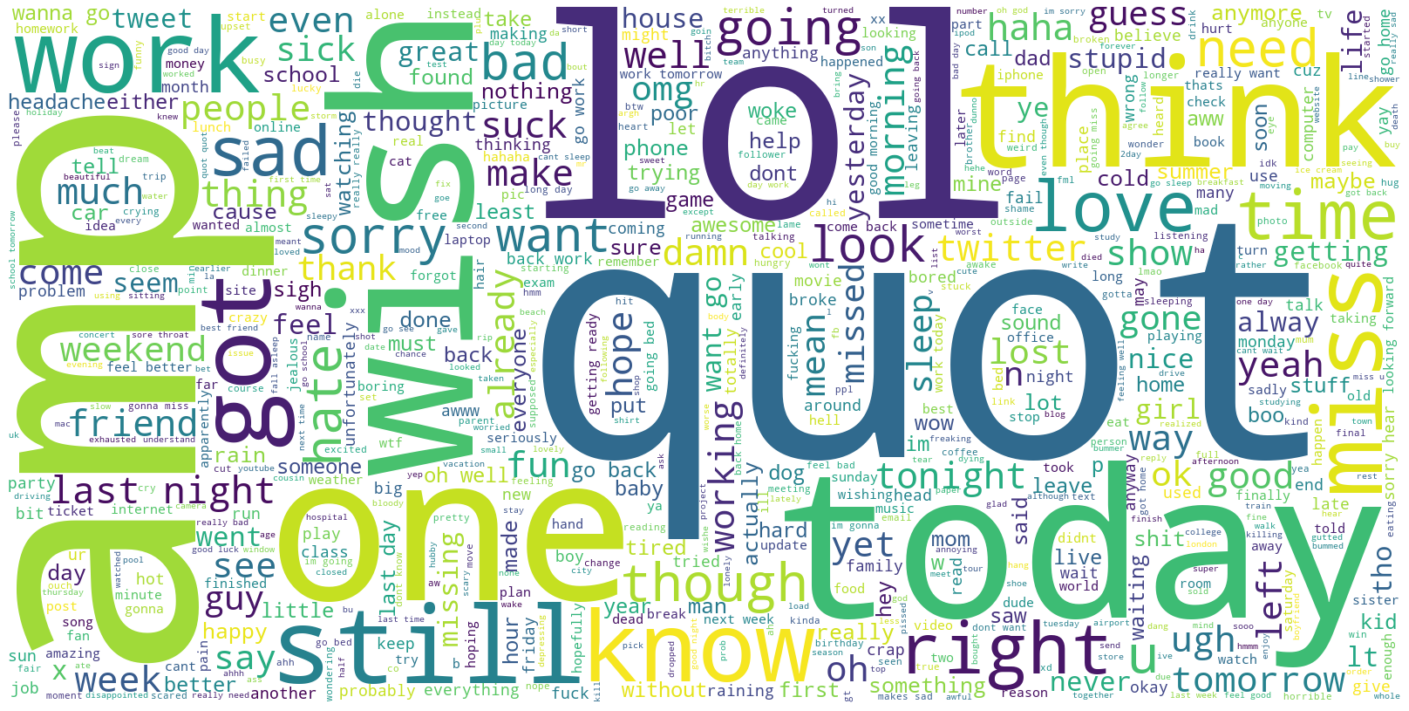

In [27]:
from wordcloud import WordCloud

plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Negative'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

### Training Data and Test Data Splitting

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=7)
print('Training Data', len(train_data), 'Test Data', len(test_data))

train_data.head(10)

Training Data 1273862 Test Data 318466


,label,tweet
927561,Positive,thank
810082,Positive,shakin money tree headed back car business
1153331,Positive,tasmania okay chat ya later
988182,Positive,yeah 100 tab storm towelled raiders awesome
543405,Negative,happy mari asleep gotta start laundry b4 wakes...
22855,Negative,wanting go city raining gotta homework 2
483675,Negative,sitting home bored x
667231,Negative,miss amy cards
1370823,Positive,dinner hubby two us 10 coupo
94439,Negative,know prob running around


In [29]:
test_data.head(10)

,label,tweet
1414233,Positive,nice job thanks
181653,Negative,way wanna shower n get pretty
788422,Negative,woke early think anyone completely bored
76646,Negative,lucky u scheduled today happy camper lol
972366,Positive,way cute curt hope school raised tons money lo...
797869,Negative,stupid braces making lips dry
1129919,Positive,good miss
1036078,Positive,past days sucked hopefully weekend happier
550532,Negative,marcus doubt megan fox good 2 years might get ...
1365388,Positive,going school contempt fash exams going conquer...


### Tokenization

In [30]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Using TensorFlow backend.


Vocabulary Size : 290458


### GLOVE Embedding

In [31]:
MODELS_PATH = '../models'
EMBEDDING_DIMENSION = 300

In [32]:
import tensorflow as tf

BATCH_SIZE = 1024
EPOCHS = 10
LR = 1e-3

embeddings_index = {}

glove_file = open('../glove/glove.6B.300d.txt', encoding='utf8')
for line in glove_file:
    values = line.split()
    word = value = values[0]
    coefficients = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefficients
glove_file.close()

print('%s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIMENSION))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = tf.keras.layers.Embedding(vocab_size, EMBEDDING_DIMENSION, weights=[embedding_matrix], input_length=30, trainable=False)

400000 word vectors.


## Feature Extraction

### Bag of Words

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

K = 10000
shuffled_df = df.sample(frac=1).reset_index(drop=True)
first_K_tweets = shuffled_df['tweet'].head(K)

vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(first_K_tweets)

# Dictionary
vectorizer.get_feature_names()

['00',
 '000',
 '007peter',
 '01',
 '03',
 '038',
 '04',
 '05',
 '05am',
 '06',
 '07',
 '08',
 '09',
 '0th',
 '10',
 '100',
 '1000',
 '1000th',
 '100k',
 '100s',
 '100th',
 '101',
 '1013',
 '102',
 '1030',
 '106',
 '1080p',
 '10days',
 '10ish',
 '10k',
 '10lbs',
 '10pm',
 '10th',
 '10x',
 '10yrs',
 '11',
 '111',
 '1130',
 '114c',
 '1199',
 '11am',
 '11pm',
 '11s',
 '11th',
 '12',
 '120',
 '1200',
 '12276',
 '128',
 '128n',
 '12hrs',
 '12pm',
 '12th',
 '13',
 '135',
 '13pm',
 '13th',
 '14',
 '140',
 '1400',
 '140conf',
 '140tc',
 '143',
 '145',
 '14th',
 '15',
 '150',
 '1500',
 '15a',
 '15am',
 '15ft',
 '15k',
 '15pm',
 '15th',
 '16',
 '160',
 '16088',
 '163',
 '165',
 '16gb',
 '16th',
 '17',
 '170',
 '172',
 '17th',
 '18',
 '180',
 '182',
 '188',
 '18th',
 '19',
 '192',
 '1979',
 '1981',
 '1984',
 '1989',
 '199',
 '1990',
 '1994',
 '1996',
 '1998',
 '19am',
 '1am',
 '1critic',
 '1direction',
 '1hr',
 '1k',
 '1men',
 '1mile',
 '1more',
 '1s',
 '1st',
 '20',
 '200',
 '2000',
 '2000th',
 

In [90]:
# Transform each tweets in vector space
vector = vectorizer.transform(first_K_tweets)
vector_spaces = vector.toarray()

vector_spaces

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [91]:
for i, v in zip(first_K_tweets, vector_spaces):
    print(i)
    print(v)

waking early tomorrow breakfast everyone leaving go home
[0 0 0 ... 0 0 0]
one sorry u sick something make u feel better like maybe sing u song love u lots
[0 0 0 ... 0 0 0]
sounds wonderful
[0 0 0 ... 0 0 0]
starving wanna eat cookies
[0 0 0 ... 0 0 0]
cleaning house today man messy
[0 0 0 ... 0 0 0]
subscribing youtube right
[0 0 0 ... 0 0 0]
hi available translate stuff japanese kind today
[0 0 0 ... 0 0 0]
know think ever read entire series
[0 0 0 ... 0 0 0]
playing quot raelynn quot
[0 0 0 ... 0 0 0]
quickly unexpectedly sun came away goes
[0 0 0 ... 0 0 0]
wow mileycyrus nickjonas kissed dating selenagomez nickjonas follow heart babe
[0 0 0 ... 0 0 0]
dude please tell toilet tweet
[0 0 0 ... 0 0 0]
thought wossy bit patronizing watched repeat last night
[0 0 0 ... 0 0 0]
gee would thought messes babies make
[0 0 0 ... 0 0 0]
cool try thai taste soon
[0 0 0 ... 0 0 0]
church great encouraged modern day reformers
[0 0 0 ... 0 0 0]
need turn alarms phones awake since 7 warm go back 

checking dogs anal galds full
[0 0 0 ... 0 0 0]
thanks
[0 0 0 ... 0 0 0]
glad make ur acquaintance even via point apparent disagreement mutual understanding
[0 0 0 ... 0 0 0]
pdfmaker part adobe acrobat works pcs work os x pdfaccess
[0 0 0 ... 0 0 0]
freakin wait see flick
[0 0 0 ... 0 0 0]
bored weekend almost
[0 0 0 ... 0 0 0]
lost please help find good home via lost dog anyone else get makes wanna buy puppies world huh
[0 0 0 ... 0 0 0]
feel ill feel like energy got drained body damn gotta go berlin tomorrow
[0 0 0 ... 0 0 0]
wrong
[0 0 0 ... 0 0 0]
lt 33 im mcfly mood lol amazing im listening girl right nowww
[0 0 0 ... 0 0 0]
wife getting relaxation drugs get watch
[0 0 0 ... 0 0 0]
getting spam guestbook purpose
[0 0 0 ... 0 0 0]
gonna go put nina sleep sick rt
[0 0 0 ... 0 0 0]
best friend leaving six weeks go romania sad day one best friends intown didnt even call
[0 0 0 ... 0 0 0]
erasing pics phone sad ned useless moment gottah move
[0 0 0 ... 0 0 0]
gym working butt literly 

[0 0 0 ... 0 0 0]
r today 1 kilometer beach
[0 0 0 ... 0 0 0]
news uk summit yet
[0 0 0 ... 0 0 0]
morning god awful weather today may lead lack boyzone following makes sad hope ok xx
[0 0 0 ... 0 0 0]
ok probably underestimated importance belgian news sun
[0 0 0 ... 0 0 0]
actually like taxi drivers yes pain hustling trying get every1 mostly succeeding
[0 0 0 ... 0 0 0]
year vow never slave lawn
[0 0 0 ... 0 0 0]
glad short went well hopefully people get involved
[0 0 0 ... 0 0 0]
going take shower fun 6 blisters feet think
[0 0 0 ... 0 0 0]
homework
[0 0 0 ... 0 0 0]
going bed hoping double espresso shots take effect
[0 0 0 ... 0 0 0]
damn looks like going forget gig 24th
[0 0 0 ... 0 0 0]
new york
[0 0 0 ... 0 0 0]
worries great missed disturbed every single time passed thru phoenix tickets sell quick
[0 0 0 ... 0 0 0]
send recognize name habit shit deleting owa recover
[0 0 0 ... 0 0 0]
miss auntie dead
[0 0 0 ... 0 0 0]
back twitter finally good back
[0 0 0 ... 0 0 0]
back days fe

music helped trough one hardest time life amp since one number 1 fans thank u miley
[0 0 0 ... 0 0 0]
got sched crs finally get bio least got enlisted backup subj picked underload sem
[0 0 0 ... 0 0 0]
thank
[0 0 0 ... 0 0 0]
totally dude give job na taking us shopping cooking food et cetra
[0 0 0 ... 0 0 0]
hey dan sure mean think iloverewards magpie competition
[0 0 0 ... 0 0 0]
double gym thing today yoga
[0 0 0 ... 0 0 0]
still bed watching real housewives new jersey 15th time lol back still hurts pain keeps coming
[0 0 0 ... 0 0 0]
hug missing
[0 0 0 ... 0 0 0]
learning french soo difficult tomorrow class test absolutly hate class tests hheellppp
[0 0 0 ... 0 0 0]
like pre less trendy functional oh actually copy paste text big one
[0 0 0 ... 0 0 0]
sorry win contest enter hectic school kids lives right
[0 0 0 ... 0 0 0]
knew parked closer exam room raining
[0 0 0 ... 0 0 0]
happy birthday
[0 0 0 ... 0 0 0]
likewise yep fb btw listened interview jeff schweitzer thought outstanding 

small voice fuck ant
[0 0 0 ... 0 0 0]
heading sister going miss chelsea match
[0 0 0 ... 0 0 0]
summerfest highlands
[0 0 0 ... 0 0 0]
lt 3 rain
[0 0 0 ... 0 0 0]
know god sounds good
[0 0 0 ... 0 0 0]
dont worry fans make feel little
[0 0 0 ... 0 0 0]
work
[0 0 0 ... 0 0 0]
whooo making html page cousin resume gonna go sleep dont wanna tango mucho sueno
[0 0 0 ... 0 0 0]
morning right well sunny friday might well starting working minutes
[0 0 0 ... 0 0 0]
living lyon 30 days go
[0 0 0 ... 0 0 0]
watchinq seven pounds movie qood quess jusst find amp see
[0 0 0 ... 0 0 0]
still love still tomorrow right
[0 0 0 ... 0 0 0]
sad really hungry good combination
[0 0 0 ... 0 0 0]
mind swine flu blah hahaha rock college ok twitter stop word limits hff
[0 0 0 ... 0 0 0]
revient du shopping avec maman
[0 0 0 ... 0 0 0]
u know like always
[0 0 0 ... 0 0 0]
people character faces great family pets also good subject
[0 0 0 ... 0 0 0]
another saturday night much today
[0 0 0 ... 0 0 0]
happy mothers

[0 0 0 ... 0 0 0]
wow sounds amazing wish ps birthday xx
[0 0 0 ... 0 0 0]
watchn reese cling papaw ruff nite lots contraxn dizzy etc think im majorly dehydrated hope 2day better day
[0 0 0 ... 0 0 0]
work japanese company student work part time hate job bad
[0 0 0 ... 0 0 0]
meet halfway
[0 0 0 ... 0 0 0]
wahh korean food right stuff good tummy hahaha
[0 0 0 ... 0 0 0]
transcribing tenth last report night
[0 0 0 ... 0 0 0]
going see star trek 3rd time today know thought might like know
[0 0 0 ... 0 0 0]
hopefully mostly biz think able squeeze fun
[0 0 0 ... 0 0 0]
lol cute
[0 0 0 ... 0 0 0]
come house play show sister
[0 0 0 ... 0 0 0]
passions claiming back passions
[0 0 0 ... 0 0 0]
wow liked
[0 0 0 ... 0 0 0]
succes
[0 0 0 ... 0 0 0]
shit finish assignments err
[0 0 0 ... 0 0 0]
suggesting nathan friendly everyone twitter wish well steve
[0 0 0 ... 0 0 0]
wish bellanicola danielita89 aims could join fun
[0 0 0 ... 0 0 0]
ok way goes faaaaaaast hope u hve fantastic day susie
[0 0 0 

[0 0 0 ... 0 0 0]
going life think happy truth lonely
[0 0 0 ... 0 0 0]
worry spelt ransacked correctly looks wrong
[0 0 0 ... 0 0 0]
see 3 uppp
[0 0 0 ... 0 0 0]
feel like spoken long
[0 0 0 ... 0 0 0]
good morning nice day wales overcast work shortly think weather problem
[0 0 0 ... 0 0 0]
excited finally sunday im going sams birthday tuesday yayayayayayay
[0 0 0 ... 0 0 0]
need new battery macbook pro gonna go swimming feel better
[0 0 0 ... 0 0 0]
poor little beef patty got made one eat
[0 0 0 ... 0 0 0]
beautiful song excellent piano intro
[0 0 0 ... 0 0 0]
stiinasteenjust bought entire outfit shoes top jeans accessories 36 dollars say supershopperhaha
[0 0 0 ... 0 0 0]
special offer moorings available reduced cost 500 week beginning june 20th due cancellation 4 bed see web
[0 0 0 ... 0 0 0]
morning twitterers yesterday summery today cold sinus pain caused face swell barely see right eye need chocolate
[0 0 0 ... 0 0 0]
love mariana jess
[0 0 0 ... 0 0 0]
lol painful nearly cried 

[0 0 0 ... 0 0 0]
first want iphone tweetdeck iphone
[0 0 0 ... 0 0 0]
finished 2 hours gym waiting sushi takeout dinner exhausted sunday night
[0 0 0 ... 0 0 0]
jason mraz itv2 tonight 9pm
[0 0 0 ... 0 0 0]
watching episodes office netflix people make absolutly sense anyways care good night
[0 0 0 ... 0 0 0]
man words eh
[0 0 0 ... 0 0 0]
haha fo sho long ad hook wendy next time go
[0 0 0 ... 0 0 0]
watching rescue cleaning kitchen
[0 0 0 ... 0 0 0]
okay doneskies night everyone
[0 0 0 ... 0 0 0]
andrew way
[0 0 0 ... 0 0 0]
glad good time take apic shirt post
[0 0 0 ... 0 0 0]
oh man everton lost fa cup yesterday
[0 0 0 ... 0 0 0]
back hurts
[0 0 0 ... 0 0 0]
new iphone
[0 0 0 ... 0 0 0]
iron tablets icky black rock poo icky due date hopefully much time left
[0 0 0 ... 0 0 0]
aww
[0 0 0 ... 0 0 0]
ty good wishes pt helped chiro helped serving wimbledon level never
[0 0 0 ... 0 0 0]
still 45 minutes flight takes going mails stuff really bored
[0 0 0 ... 0 0 0]
yes amazing sad know 2 l

[0 0 0 ... 0 0 0]
info table novo na sajtu via addthis
[0 0 0 ... 0 0 0]
encanta mailchimp
[0 0 0 ... 0 0 0]
oh come karen cool know
[0 0 0 ... 0 0 0]
going riding
[0 0 0 ... 0 0 0]
watching vfc videos ipod quot smell fresh spykid quot aww lt 3 boys
[0 0 0 ... 0 0 0]
freaking find hair dressers number lord knows need
[0 0 0 ... 0 0 0]
happy mother day women
[0 0 0 ... 0 0 0]
need cabana boy dammit shake popcorn stick around feed
[0 0 0 ... 0 0 0]
needs finish albi arghh ran glue
[0 0 0 ... 0 0 0]
driving dodge one behind front highway gonna friends awesome
[0 0 0 ... 0 0 0]
ahh thought looked like pacific northwest people thanks
[0 0 0 ... 0 0 0]
happy lunchtime new shoes bargain price
[0 0 0 ... 0 0 0]
thank awesome role model young girls times need girls like selenegomez
[0 0 0 ... 0 0 0]
missing friends badly
[0 0 0 ... 0 0 0]
haha glad see around week far
[0 0 0 ... 0 0 0]
mom making french toast
[0 0 0 ... 0 0 0]
ahhh found gita tab excited
[0 0 0 ... 0 0 0]
ahhh katie thats favou

[0 0 0 ... 0 0 0]
feel really bad demi realised refered u ashtons mom days ago sincere apologises ashton
[0 0 0 ... 0 0 0]
missed seattle show mom like quot summer set quot sorry stereo skyline tss would awesome tour
[0 0 0 ... 0 0 0]
shares posted entry tumblr
[0 0 0 ... 0 0 0]
paintballing friday makayla cody brandon brandon makayla mom coolest person ever stewart jade
[0 0 0 ... 0 0 0]
fuck lost phone sd memory card shit
[0 0 0 ... 0 0 0]
lee ann womack unexpected surprise start
[0 0 0 ... 0 0 0]
need company
[0 0 0 ... 0 0 0]
favicon showing admin login actual sites even restarting
[0 0 0 ... 0 0 0]
wish came romania
[0 0 0 ... 0 0 0]
listening sights sounds epic
[0 0 0 ... 0 0 0]
mei saw lyrics oh atoms sugar mouse blog know listened
[0 0 0 ... 0 0 0]
omg think ever loved car long ass concert almost got crushed
[0 0 0 ... 0 0 0]
alrighty well im going 2 see hangover fiiiiinally time 2 see cracked 2
[0 0 0 ... 0 0 0]
revision sucks ass cbaaaaaaaaaaa enough sleep last night need cat

[0 0 0 ... 0 0 0]
love pic thanks ava love donathan
[0 0 0 ... 0 0 0]
nervous big chunk skin im gunna get taken outta lip hahaha
[0 0 0 ... 0 0 0]
sick think stage cough lol
[0 0 0 ... 0 0 0]
still transit
[0 0 0 ... 0 0 0]
jealous gone hammersmith one x
[0 0 0 ... 0 0 0]
dont know gonna b day wanna fun party know
[0 0 0 ... 0 0 0]
trip nyc cancelled
[0 0 0 ... 0 0 0]
argh going spend rest evening going quot mahna mahna quot cats
[0 0 0 ... 0 0 0]
goodsex kimkardashian guest appearance blasiansixfoota peeking window drooling
[0 0 0 ... 0 0 0]
arrived 46 greenwich ave upstairs come back
[0 0 0 ... 0 0 0]
u gots gah cant type psssh ruined lol
[0 0 0 ... 0 0 0]
3 kids lol already gone friday sunday hubby plans saturday
[0 0 0 ... 0 0 0]
exactly hmmmm happens try complicate like facebook
[0 0 0 ... 0 0 0]
hahah alright sounds like plan know havent seen alot disney stuff kids
[0 0 0 ... 0 0 0]
currently writing entry greys anatomy rpg erica g relationship callie starts
[0 0 0 ... 0 0 0]
fit

[0 0 0 ... 0 0 0]
ginormous mosquito bite leg
[0 0 0 ... 0 0 0]
night improved
[0 0 0 ... 0 0 0]
arms hurting sunburned painting forgot put sunblock
[0 0 0 ... 0 0 0]
today britney bought butt load temporary tattoos put five hahaha two tramp stamps
[0 0 0 ... 0 0 0]
meine dur hre ist kaputt quot error occurred please try later quot
[0 0 0 ... 0 0 0]
shame awesome dinner grrr
[0 0 0 ... 0 0 0]
soooooooo muggy mil cleaned house lost umbrella
[0 0 0 ... 0 0 0]
today birthday totally shit
[0 0 0 ... 0 0 0]
feell left brah thought u mad tattoos son
[0 0 0 ... 0 0 0]
wake lake view morning
[0 0 0 ... 0 0 0]
way end day
[0 0 0 ... 0 0 0]
hey old writing avoidance write 1 continuous flow non stop 4 10 mins trick use 2 loosen gremlins
[0 0 0 ... 0 0 0]
got far much work today
[0 0 0 ... 0 0 0]
miss
[0 0 0 ... 0 0 0]
reading alancarr biography love alan love xxx
[0 0 0 ... 0 0 0]
lucky want cool luv ya katie beth
[0 0 0 ... 0 0 0]
battle guitar practice improvement 30mins even got admit enjoyed 

oh damn squares aint even open
[0 0 0 ... 0 0 0]
probably gonna move sold property need house soon happy
[0 0 0 ... 0 0 0]
haha cool thanks people actually call tsar twitter empire try take russia
[0 0 0 ... 0 0 0]
change plans people tattoo tomorrow
[0 0 0 ... 0 0 0]
using n95 best way use twitter mobile site trying convince one parents take hands
[0 0 0 ... 0 0 0]
still feel like craaaap like everyone earth needs know lol fun birdies
[0 0 0 ... 0 0 0]
say green bethyesterday says yellow one else likes
[0 0 0 ... 0 0 0]
fb long time bank banned access fb
[0 0 0 ... 0 0 0]
going work everyday would lot easier people would grow
[0 0 0 ... 0 0 0]
swami one day
[0 0 0 ... 0 0 0]
pick photoshop tablet tonight nowhere white stuck black looks shitty w macbook
[0 0 0 ... 0 0 0]
done lab report ouch 4 red bulls hurt tummy
[0 0 0 ... 0 0 0]
leaving canada congrats amazing junior four best crew trip ever
[0 0 0 ... 0 0 0]
nooo voted 585 times even kidding ahh could lose upset
[0 0 0 ... 0 0 0]
w

[0 0 0 ... 0 0 0]
shame u left ur list
[0 0 0 ... 0 0 0]
hmmm possible watch hammond work assessment like say yes thinkthe correct answer
[0 0 0 ... 0 0 0]
causing chaos downtown chicago
[0 0 0 ... 0 0 0]
bored need something dont know
[0 0 0 ... 0 0 0]
know samee omfg blonde one mineee except look different public think rofl
[0 0 0 ... 0 0 0]
friend sierra doesnt want pic taken moving away
[0 0 0 ... 0 0 0]
think get sleep good night
[0 0 0 ... 0 0 0]
thanks much link techie person none means anything though
[0 0 0 ... 0 0 0]
41 degrees c london uk challenging france wine growing forecast 2080
[0 0 0 ... 0 0 0]
jeweliyah gunna driving somewhere get something eat car wont start reason
[0 0 0 ... 0 0 0]
still waiting tie fighter 2
[0 0 0 ... 0 0 0]
let go wins today
[0 0 0 ... 0 0 0]
playing games 1st period never gives us real work
[0 0 0 ... 0 0 0]
feeling picky yeah
[0 0 0 ... 0 0 0]
going lie sad leaving far away
[0 0 0 ... 0 0 0]
love dresses amazing lauren
[0 0 0 ... 0 0 0]
101 1 

[0 0 0 ... 0 0 0]
aww neither crap spaghetti like favourite food ever allowed eat
[0 0 0 ... 0 0 0]
tonight f1 finger crossed button
[0 0 0 ... 0 0 0]
alana never came dance 2 hours gym
[0 0 0 ... 0 0 0]
sad without please come back one day xx
[0 0 0 ... 0 0 0]
perked amp wanted food still running temp swimming lessons tonight
[0 0 0 ... 0 0 0]
sorry hear
[0 0 0 ... 0 0 0]
reporting vicious pit bull mix animal control unprovoked attack golden retriever merely walking wife
[0 0 0 ... 0 0 0]
handle one teen lol husband even acts like one times son girls yet hope
[0 0 0 ... 0 0 0]
hiii thunderstorm wednesday night sooo cool rained much nightlights sky amazing lt 3
[0 0 0 ... 0 0 0]
got text e news saying jon amp kate filed divorce earlier today courthouse pennsylvania sad day
[0 0 0 ... 0 0 0]
sick joke fooling
[0 0 0 ... 0 0 0]
ive burnt finger hurts bad
[0 0 0 ... 0 0 0]
online soap totally awesome long
[0 0 0 ... 0 0 0]
way hernbay beach mela anyone wanna join us uk
[0 0 0 ... 0 0 0]
d

[0 0 0 ... 0 0 0]
patar101 house playing loud music
[0 0 0 ... 0 0 0]
theater
[0 0 0 ... 0 0 0]
boo russell howard stage 50 mins poor warm finished 25 mins ago
[0 0 0 ... 0 0 0]
got side fringe cut kinda cute
[0 0 0 ... 0 0 0]
im pain come buy advil lol
[0 0 0 ... 0 0 0]
apparently huge clouds coming soon
[0 0 0 ... 0 0 0]
bed time dont want cos wake maths exammm
[0 0 0 ... 0 0 0]
really totally bummed connected google voice account wrong gmail account
[0 0 0 ... 0 0 0]
tweet included longest poem world www longestpoemintheworld com tweet 16088
[0 0 0 ... 0 0 0]
believe one day rogers fix phone doc maybe facial pedicure afternoon yes good plan
[0 0 0 ... 0 0 0]
nice made smile
[0 0 0 ... 0 0 0]
eye allergies means early night got lots ideas fresh start tomorrow anyway
[0 0 0 ... 0 0 0]
paradise check newest blog www diaryofabathingbeauty blogspot com follow
[0 0 0 ... 0 0 0]
sorting clothes fun im messy barely started already tired
[0 0 0 ... 0 0 0]
part qt wanted share read amp soak g

[0 0 0 ... 0 0 0]
miss boyfriend
[0 0 0 ... 0 0 0]
nup cd either whole bunch zeros ones free
[0 0 0 ... 0 0 0]
moving bed bit read sleepy byes get early enough go get yoshi yes gandalf
[0 0 0 ... 0 0 0]
loves army wives
[0 0 0 ... 0 0 0]
omg 4ev since post lazy
[0 0 0 ... 0 0 0]
like 270 nuts oh one good
[0 0 0 ... 0 0 0]
aw sorry mean make sad think well happy stuff
[0 0 0 ... 0 0 0]
saw bit tony hawk ride cod mw2 climbing ice axes generally sites overloaded
[0 0 0 ... 0 0 0]
aww atleast going though
[0 0 0 ... 0 0 0]
3 kebapcheta lutenica 1 bun 0 90 eur real bargain
[0 0 0 ... 0 0 0]
find suspenders anywhere keep searching needing entertained
[0 0 0 ... 0 0 0]
super cute u skip ur holding ur lunch bag really luvs ya
[0 0 0 ... 0 0 0]
doesnt water door dispense ice freezer crushed though added water filter sink
[0 0 0 ... 0 0 0]
hot shower perfect remedy stressful day mmhmm watching clueless bed goodnight twitterverse
[0 0 0 ... 0 0 0]
realize lucky playing wiffle ball jonas brothers 

[0 0 0 ... 0 0 0]
feel like shit jonas brothers love us hate everything atm mollie fixed bitt xxx
[0 0 0 ... 0 0 0]
long beach girls night
[0 0 0 ... 0 0 0]
yay u get time 4 urself ooo 2 altho havent seen yet hope u luv
[0 0 0 ... 0 0 0]
tomorrow go fitness studio must learning employment law exam
[0 0 0 ... 0 0 0]
thanks link sounds like great song
[0 0 0 ... 0 0 0]
really want gelli baff ahaha
[0 0 0 ... 0 0 0]
oooh sore exam prep lame contemplating whether actually write accept high 60s marks
[0 0 0 ... 0 0 0]
ice cap except leaking pants office place wear pants
[0 0 0 ... 0 0 0]
good morning time coffee mmm
[0 0 0 ... 0 0 0]
things going well bf
[0 0 0 ... 0 0 0]
missing 2 games tomorrow turkish gp french open men final hate duty
[0 0 0 ... 0 0 0]
got exams soon
[0 0 0 ... 0 0 0]
heyya rosie upto cant go a2aa website find anymore xx
[0 0 0 ... 0 0 0]
slept women last night name noir french inspired music put ease
[0 0 0 ... 0 0 0]
work 7 monday friday good week need sleeep
[0 0 0 .

[0 0 0 ... 0 0 0]
feeling good today
[0 0 0 ... 0 0 0]
yea great days reconnecting old dear friends friends blessings angels disguise
[0 0 0 ... 0 0 0]
nice amp bright day thank jesus
[0 0 0 ... 0 0 0]
ahhh ok ok thats cooll u like dc
[0 0 0 ... 0 0 0]
lol much poor daddy lol jokes hurt lol still chiropactor want hanachi nao lol xd
[0 0 0 ... 0 0 0]
looked marker wrote long win7il
[0 0 0 ... 0 0 0]
purchased sims 3 application going try review guys soon
[0 0 0 ... 0 0 0]
train ardrossan means back work 2 weeks
[0 0 0 ... 0 0 0]
hugs missed fail win
[0 0 0 ... 0 0 0]
leaving mall soon seeing drag hell staying tessa graduation tomorrow loveeee lt 33
[0 0 0 ... 0 0 0]
heading europe fall wonder nokia could try
[0 0 0 ... 0 0 0]
starting work new student short film carjacked join facebook page carjacked
[0 0 0 ... 0 0 0]
ive wanting 2 gone 4 2 mo amp close shops
[0 0 0 ... 0 0 0]
got rejected
[0 0 0 ... 0 0 0]
feel awake moment whole life clarity seeing things knowing way goodnight
[0 0 0 

[0 0 0 ... 0 0 0]
love spunky new ads donatenz home page flash design skills donated jayceb thanks
[0 0 0 ... 0 0 0]
hell awake lol outta bed four hour nap good go bed early tonight
[0 0 0 ... 0 0 0]
cold one certainly go miss
[0 0 0 ... 0 0 0]
er another trick question thinking pooooossibly estp
[0 0 0 ... 0 0 0]
one weird habbits 747 sarah hilary
[0 0 0 ... 0 0 0]
boxer 3 noticed white one blood face
[0 0 0 ... 0 0 0]
thanks
[0 0 0 ... 0 0 0]
think love lot problems
[0 0 0 ... 0 0 0]
hey finished watching movie good
[0 0 0 ... 0 0 0]
awwwwwh wanted aiden davis 2 win lt 3 bummed didnt
[0 0 0 ... 0 0 0]
picture moo box gotta see good one pimpthecat since moo young twitter
[0 0 0 ... 0 0 0]
true u dont want b standing u want b real close like talking 2 n arms amp head chst
[0 0 0 ... 0 0 0]
yup guess
[0 0 0 ... 0 0 0]
got purse stolen car last night totally ruined fun party
[0 0 0 ... 0 0 0]
mad sleepy finding hard keep eyes open
[0 0 0 ... 0 0 0]
sleep got like 5 6 hours sleep work got

[0 0 0 ... 0 0 0]
apple taking time
[0 0 0 ... 0 0 0]
gonna clear camera charge tomorrow
[0 0 0 ... 0 0 0]
thank lt 3
[0 0 0 ... 0 0 0]
ewwwww gross sounds like start good day
[0 0 0 ... 0 0 0]
nice lot ppl hope cuz really nice past yr
[0 0 0 ... 0 0 0]
bet neat nice see nature beauty
[0 0 0 ... 0 0 0]
already working issue w dept said call directly issues guess
[0 0 0 ... 0 0 0]
really really really want go 140conf tmrw rocking twitter since 06
[0 0 0 ... 0 0 0]
want know scares united states marine corps scout sniper economy michigan usa even hottub
[0 0 0 ... 0 0 0]
yeah one friends coming
[0 0 0 ... 0 0 0]
thinking bout going sleep soon cant assed college tomorrow know cause ive got stuff finish
[0 0 0 ... 0 0 0]
home computer sadly incredibly slow prob handle thanks tho
[0 0 0 ... 0 0 0]
today got two bracelets tiara free sometimes life gives pleasant suprise
[0 0 0 ... 0 0 0]
hmm well kinda lasted like 2 days pretty much impossible thats sad isnt x
[0 0 0 ... 0 0 0]
www mydrunkte

[0 0 0 ... 0 0 0]
good enough single panel joke
[0 0 0 ... 0 0 0]
button shirt pants easy saying thatswhatshesaid much
[0 0 0 ... 0 0 0]
listening music might going somewhere mom brother grandmother woopie
[0 0 0 ... 0 0 0]
wrong
[0 0 0 ... 0 0 0]
wants watch house amp got grey season 4 dvd
[0 0 0 ... 0 0 0]
sms properly touchscreen miss w595 baby glad discharged soon
[0 0 0 ... 0 0 0]
feeling well
[0 0 0 ... 0 0 0]
super tired going bed going surtex 2morrow much homefront night tweeps
[0 0 0 ... 0 0 0]
ahhh tis good gym going full eighties outfit go
[0 0 0 ... 0 0 0]
blegh back work tomorrow morning wasted weekend
[0 0 0 ... 0 0 0]
would prefer 1 monday
[0 0 0 ... 0 0 0]
updated blog market analysis june 1 2009
[0 0 0 ... 0 0 0]
godfather trilogy movie review coolshite remember comment blog
[0 0 0 ... 0 0 0]
thanks pasher reckon either pre election public persuasion otherwise
[0 0 0 ... 0 0 0]
know til event besides skint atm hay festival stalking car insurance killed
[0 0 0 ... 0 0 0

[0 0 0 ... 0 0 0]
changed twitter user name mhmm
[0 0 0 ... 0 0 0]
aw dear hope gets well soon remind flu
[0 0 0 ... 0 0 0]
sleep tired going try anyway
[0 0 0 ... 0 0 0]
lol also 98 identical great apes close swinging trees
[0 0 0 ... 0 0 0]
internship hopefully end early todayy beach house fridayyy
[0 0 0 ... 0 0 0]
musiclovrrr feels rejected get hugged back
[0 0 0 ... 0 0 0]
lol kind
[0 0 0 ... 0 0 0]
psssh wish idiot dont wanna send service cant part
[0 0 0 ... 0 0 0]
work bleaching girl white ahahahaha funny stuff
[0 0 0 ... 0 0 0]
sure easy wishing best patching amp disney
[0 0 0 ... 0 0 0]
new york city night future home
[0 0 0 ... 0 0 0]
aww stickam failed
[0 0 0 ... 0 0 0]
goodmorning melbourne twitterverse
[0 0 0 ... 0 0 0]
woo hoo finally broke mark 165 50 pounds go lol hey last 43 pounds werent bad lose
[0 0 0 ... 0 0 0]
ones know twitter oh amp twitter article almost done tweaks
[0 0 0 ... 0 0 0]
finally going sleep goodnight everyone
[0 0 0 ... 0 0 0]
fight rock wall rock

[0 0 0 ... 0 0 0]
first tweet whhhoooo lovin sunshine
[0 0 0 ... 0 0 0]
got tickets go see creed anniversary dating seemed like always ended dancing quot arms wide open quot
[0 0 0 ... 0 0 0]
morning hey games cancelled yeah
[0 0 0 ... 0 0 0]
car broke
[0 0 0 ... 0 0 0]
sorry maxed 2001
[0 0 0 ... 0 0 0]
know mine gets zillion get one tweets inbox lol
[0 0 0 ... 0 0 0]
question good idea put first place
[0 0 0 ... 0 0 0]
tut tut vitaredux tweet work
[0 0 0 ... 0 0 0]
good still get go
[0 0 0 ... 0 0 0]
room different part house good thing least
[0 0 0 ... 0 0 0]
pancakes bad feel sick
[0 0 0 ... 0 0 0]
fingers hurt
[0 0 0 ... 0 0 0]
happy mother day
[0 0 0 ... 0 0 0]
rancid new album alot playtime ipod final show tomorrow
[0 0 0 ... 0 0 0]
watching jolee pwn food kelly introducing early
[0 0 0 ... 0 0 0]
one tomorrow oh haha lola birthday gonna watch fashion shows monday tuesday wednesday
[0 0 0 ... 0 0 0]
like peoplewatching like prospect falling five story building
[0 0 0 ... 0 0 0]


### tf-idf

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

# Learn vocabulary from tweets 
vectorizer.fit(first_K_tweets)

# Vocabulary
vectorizer.vocabulary_

{'waking': 13272,
 'early': 3966,
 'tomorrow': 12456,
 'breakfast': 1866,
 'leaving': 7117,
 'home': 5872,
 'sorry': 11369,
 'sick': 11031,
 'make': 7562,
 'feel': 4498,
 'better': 1496,
 'like': 7206,
 'maybe': 7726,
 'sing': 11078,
 'song': 11342,
 'love': 7414,
 'lots': 7396,
 'sounds': 11387,
 'wonderful': 13622,
 'starving': 11591,
 'wanna': 13296,
 'eat': 3985,
 'cookies': 2940,
 'cleaning': 2614,
 'house': 5968,
 'today': 12425,
 'man': 7586,
 'messy': 7876,
 'subscribing': 11766,
 'youtube': 13912,
 'right': 10284,
 'hi': 5778,
 'available': 1115,
 'translate': 12579,
 'stuff': 11742,
 'japanese': 6493,
 'kind': 6846,
 'know': 6897,
 'think': 12269,
 'read': 9949,
 'entire': 4158,
 'series': 10805,
 'playing': 9365,
 'quot': 9844,
 'raelynn': 9867,
 'quickly': 9830,
 'unexpectedly': 12919,
 'sun': 11834,
 'came': 2155,
 'away': 1139,
 'goes': 5210,
 'wow': 13708,
 'mileycyrus': 7940,
 'nickjonas': 8483,
 'kissed': 6864,
 'dating': 3316,
 'selenagomez': 10758,
 'follow': 4714,
 

In [93]:
# Transform to document by term matrix
vector_spaces = vectorizer.transform(first_K_tweets)
vector_spaces.toarray()

MemoryError: Unable to allocate 1.04 GiB for an array with shape (10000, 13986) and data type float64

In [ ]:
for i, v in zip(first_K_tweets, vector_spaces):
    print(i)
    print(v)

In [ ]:
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

labels_dict = {'Negative':'red', 'Neutral':'gray', 'Positive':'blue'}

def convert_labels(label):
    return labels_dict[label]

first_K_targets = shuffled_df.head(K).label.apply(lambda x: convert_labels(x))



#newsgroups_train = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(first_K_tweets).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.figure(figsize = (20, 20))
plt.scatter(data2D[:,0], data2D[:,1], c=first_K_targets)
plt.show()              #not required if using ipython notebook